In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

### 1. | Loading data

In [7]:
data = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# 2. EXPLORATORY DATA NALYSIS
 

# Let's proceed with the Exploratory Data Analysis (EDA):

    
### 1. Univariate Analysis: In this analysis, we will look at each variable individually. This could           include looking at the distribution of a variable, checking for outliers, or checking the               central tendency (mean, median, mode) of the variable.

### 2. Bivariate Analysis: In this analysis, we will look at the relationship between two variables.          This could include looking at correlation, cross-tabulation, or using visualization to observe the      relationship.

### 3. Multivariate Analysis: In this analysis, we will look at the interactions between multiple variables at once. This could include complex visualization, factor analysis, or other statistical methods

In [26]:
print("########## Info #############")
print(data.info())


########## Info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64


In [27]:
print("########## shape #############")
data.shape


########## shape #############


(1000, 19)

In [29]:
print("########## Data Types #############")
print(data.dtypes)

########## Data Types #############
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Year                        object
Month                       object
dtype: object


In [34]:
print("########## Head of Data #############")
print(data.head(5))

########## Head of Data #############
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 

In [36]:
print("########## Tail of Data #############")
print(data.tail(5))

########## Tail of Data #############
      Invoice ID Branch       City Customer type  Gender         Product line  \
995  233-67-5758      C  Naypyitaw        Normal    Male    Health and beauty   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   
997  727-02-1313      A     Yangon        Member    Male   Food and beverages   
998  347-56-2442      A     Yangon        Normal    Male   Home and lifestyle   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date   Time  Payment  \
995       40.35         1   2.0175    42.3675  1/29/2019  13:46  Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  17:16  Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  13:22     Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  15:33     Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  13:28     Cash   

       cogs  gross

In [37]:
print("########## nunique #############")

data.nunique()


########## nunique #############


Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
Year                          1
Month                         3
dtype: int64

In [15]:
data.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [38]:
print("########## Null Values of Data #############")

data.isnull().sum()


########## Null Values of Data #############


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
dtype: int64

In [24]:
print("########## Describe of the Numerical Datas #############")
print(data.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

########## Describe of the Numerical Datas #############
                          count        mean         std        min         0%  \
Unit price               1000.0   55.672130   26.494628  10.080000  10.080000   
Quantity                 1000.0    5.510000    2.923431   1.000000   1.000000   
Tax 5%                   1000.0   15.379369   11.708825   0.508500   0.508500   
Total                    1000.0  322.966749  245.885335  10.678500  10.678500   
cogs                     1000.0  307.587380  234.176510  10.170000  10.170000   
gross margin percentage  1000.0    4.761905    0.000000   4.761905   4.761905   
gross income             1000.0   15.379369   11.708825   0.508500   0.508500   
Rating                   1000.0    6.972700    1.718580   4.000000   4.000000   

                                5%         50%         95%         99%  \
Unit price               15.279000   55.230000   97.222000   99.710200   
Quantity                  1.000000    5.000000   10.000000   10.0

In [20]:
### Adding data with Year and Month


data['Year']=data['Date'].apply(lambda x:x.split('/')[2])
data['Month']=data['Date'].apply(lambda x:x.split('/')[0])
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3


## 3. Preparation of the Data
#### In this stage, dataframe will be checked and filtered if any null or negative values are including in the data.

In [40]:
# dropna() command will help to drop the null values from the data.
data.dropna(inplace = True)

# Lets check the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [41]:
# Lets filtered the data from negative values. 

data[data["Quantity"] < 0]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


# 1| Univariate Analysis 


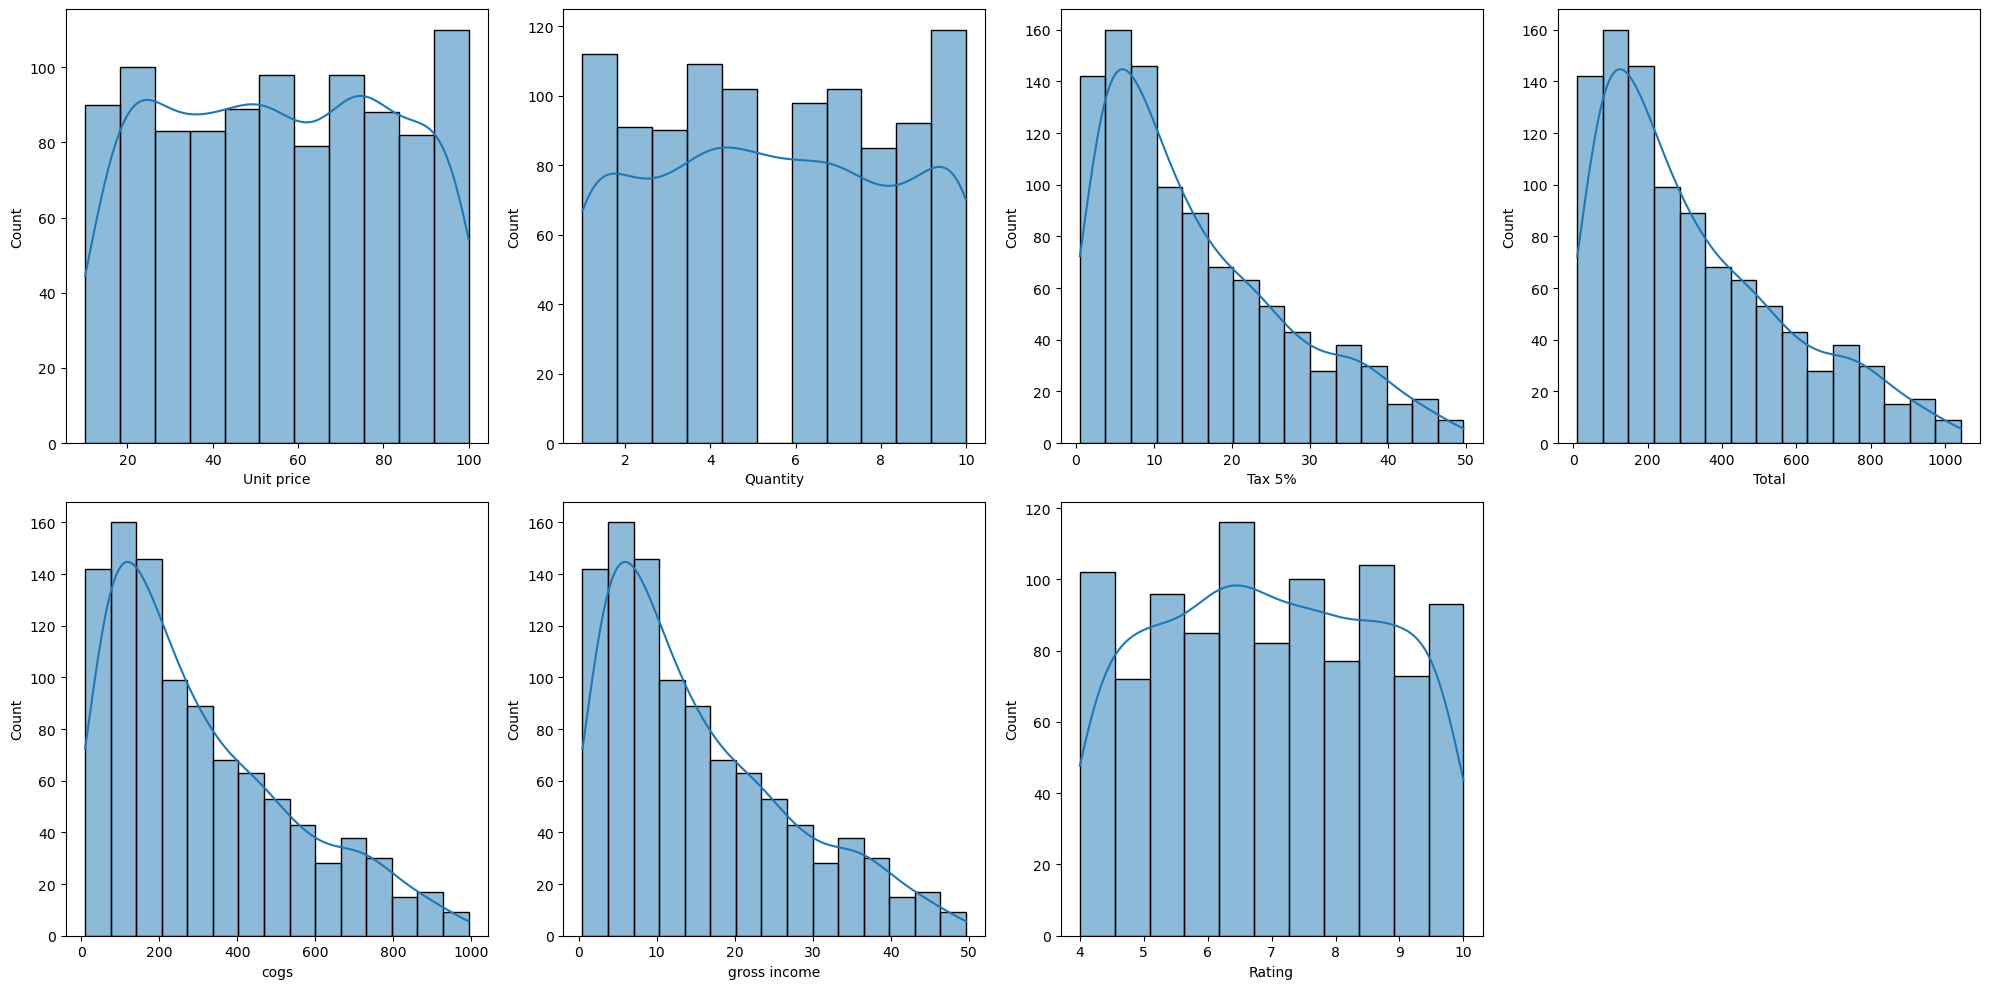

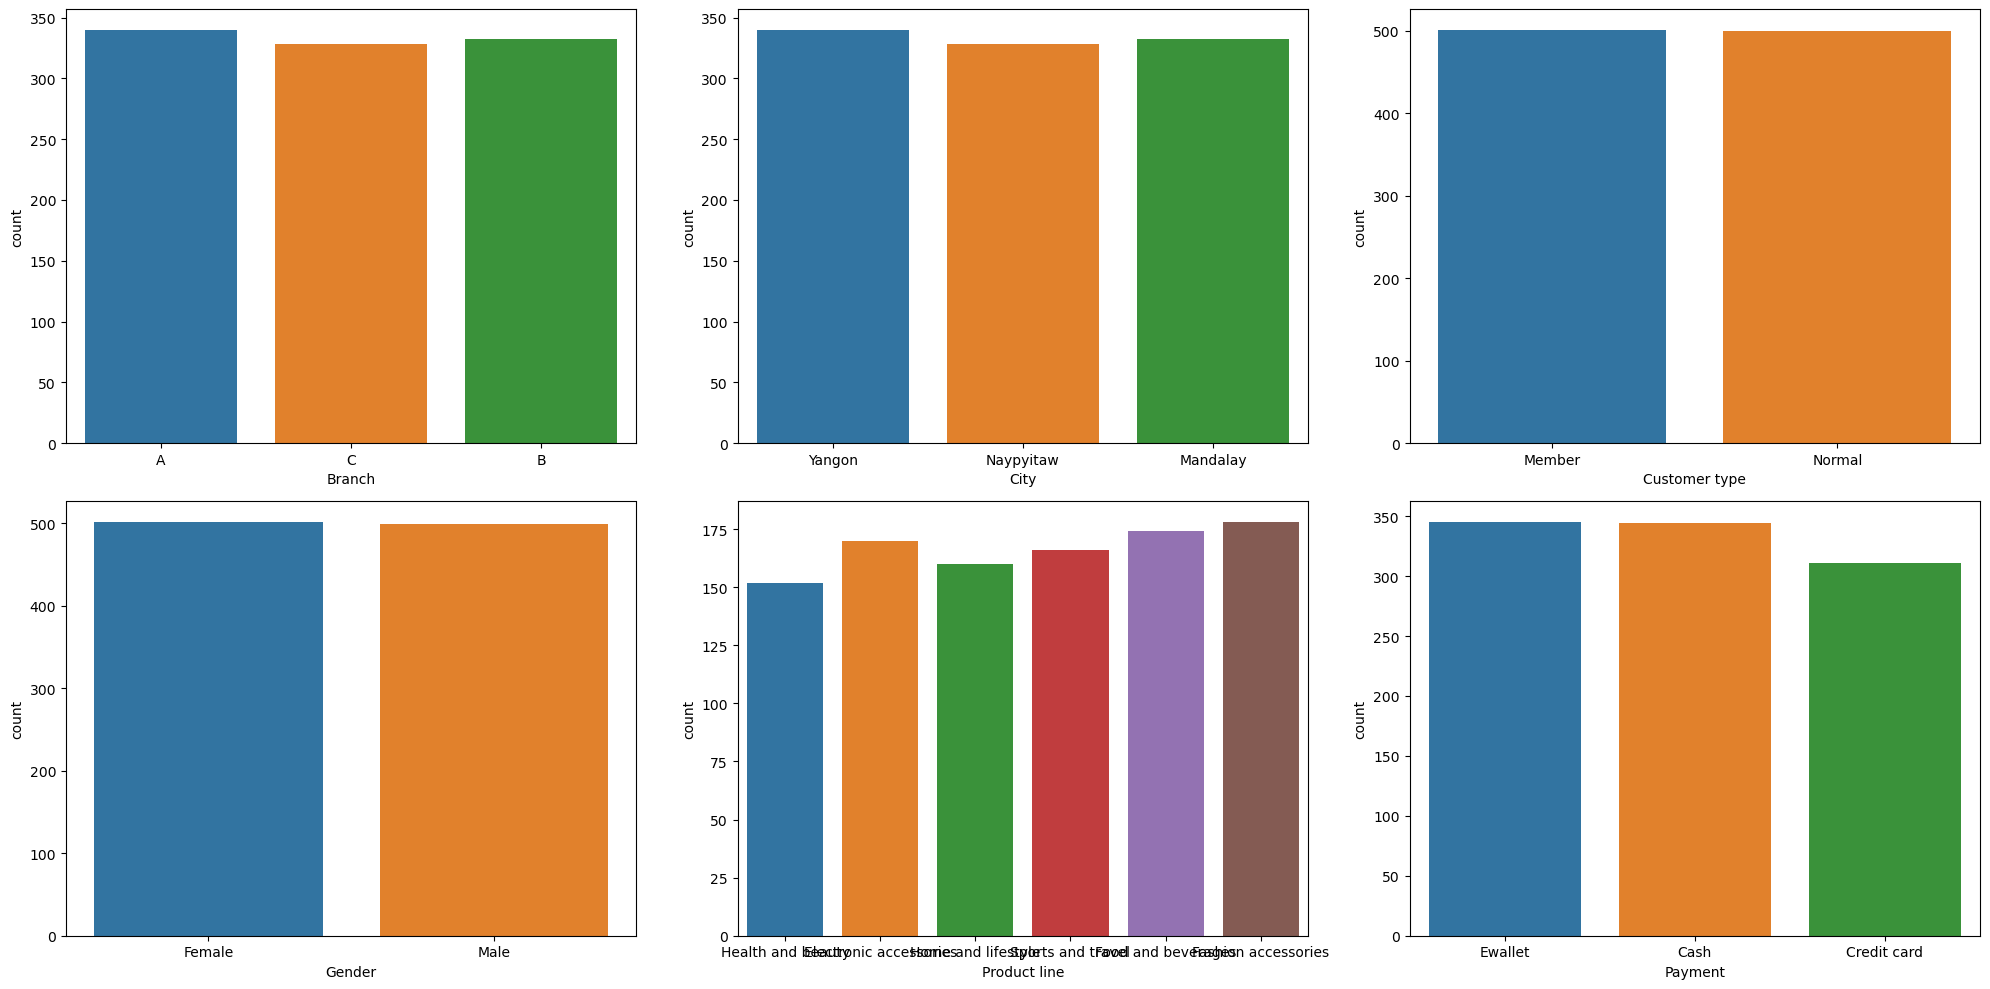

In [22]:

# Histograms for numerical columns
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(numerical_columns):
    row = i // 4
    pos = i % 4
    sns.histplot(data[col], kde=True, ax=axs[row, pos])

fig.delaxes(axs[1,3]) # we remove the last sub-plot which is empty
plt.tight_layout()
plt.show()

# Bar plots for categorical columns
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(categorical_columns):
    row = i // 3
    pos = i % 3
    sns.countplot(x=data[col], ax=axs[row, pos])

plt.tight_layout()
plt.show()

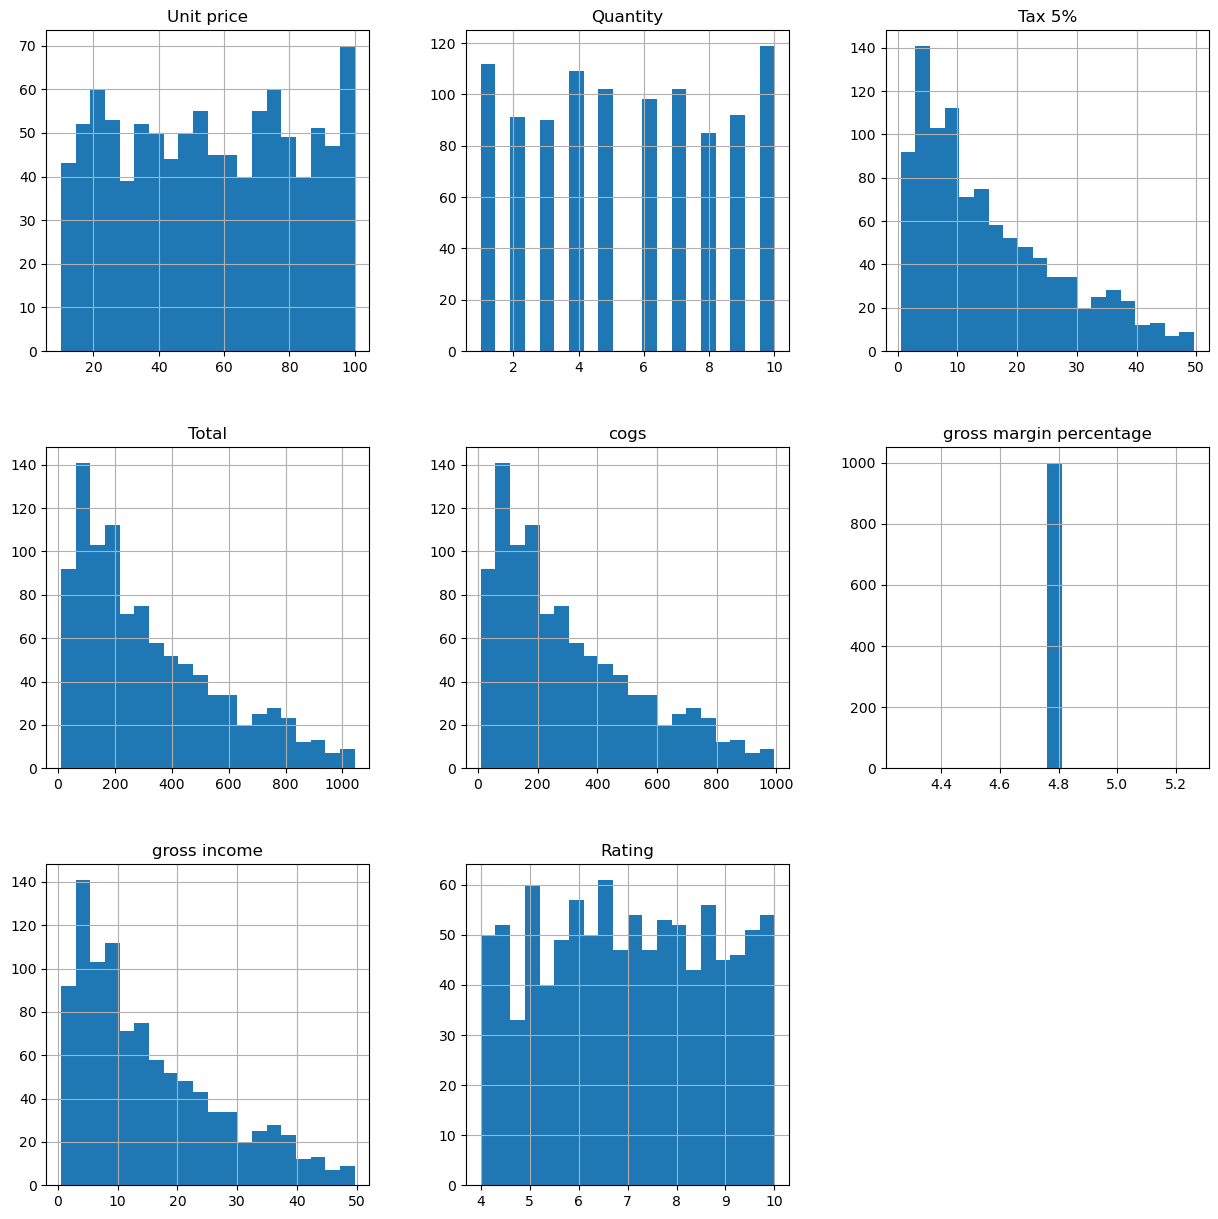

In [39]:
# Lets see the general distrubition of the numerical variables

axList = data.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

## Numerical Variables:
###   🔢 Unit price: The unit price of the products appears to be slightly right-skewed, with most of the prices falling in the range of 50-100. 💰

###  🔢 Quantity: The quantity of items purchased per transaction seems to be quite evenly distributed across the dataset. 🛍️

### 🔢 Tax 5% and Total: The tax and total cost of transactions exhibit similar distributions, with most of the values falling in the lower range. Both distributions are right-skewed. 💸

### 🔢 cogs: The cost of goods sold (COGS) mirrors the distribution of the total cost, which is expected as the total cost is derived from the COGS. 📦

### 🔢 Gross income: The gross income follows a similar distribution to the tax and total cost, which is expected as the gross income is derived from the tax. 💵

### 🔢 Rating: Customer ratings seem to be somewhat normally distributed, with a few dips and peaks. The majority of ratings are in the range of 6 to 8. ⭐️

## Categorical Variables:
### 🏬 Branch: Branches A and B have more transactions than Branch C. 🌳

### 🌆 City: Yangon and Mandalay have more transactions compared to Naypyitaw. 🏙️

### 👥 Customer type: The dataset has a roughly equal number of members and normal customers. 🤝

### 🧑‍🤝‍🧑 Gender: The number of male and female customers is almost equal. ♀️♂️

### 🛍️ Product line: The sales across different product lines are quite balanced, with Fashion and accessories slightly leading. 👗👠

### 💳 Payment: Ewallet is the most popular payment method, followed by Cash and Credit card. 💻💰💳

##### Next, we'll move on to the bivariate analysis. We'll examine how different variables interact with each other. For example, we'll look at how the total cost of a transaction changes with the quantity of items purchased, or how sales vary across different branches. 📊🔍


## 2| Bivariate Analysis


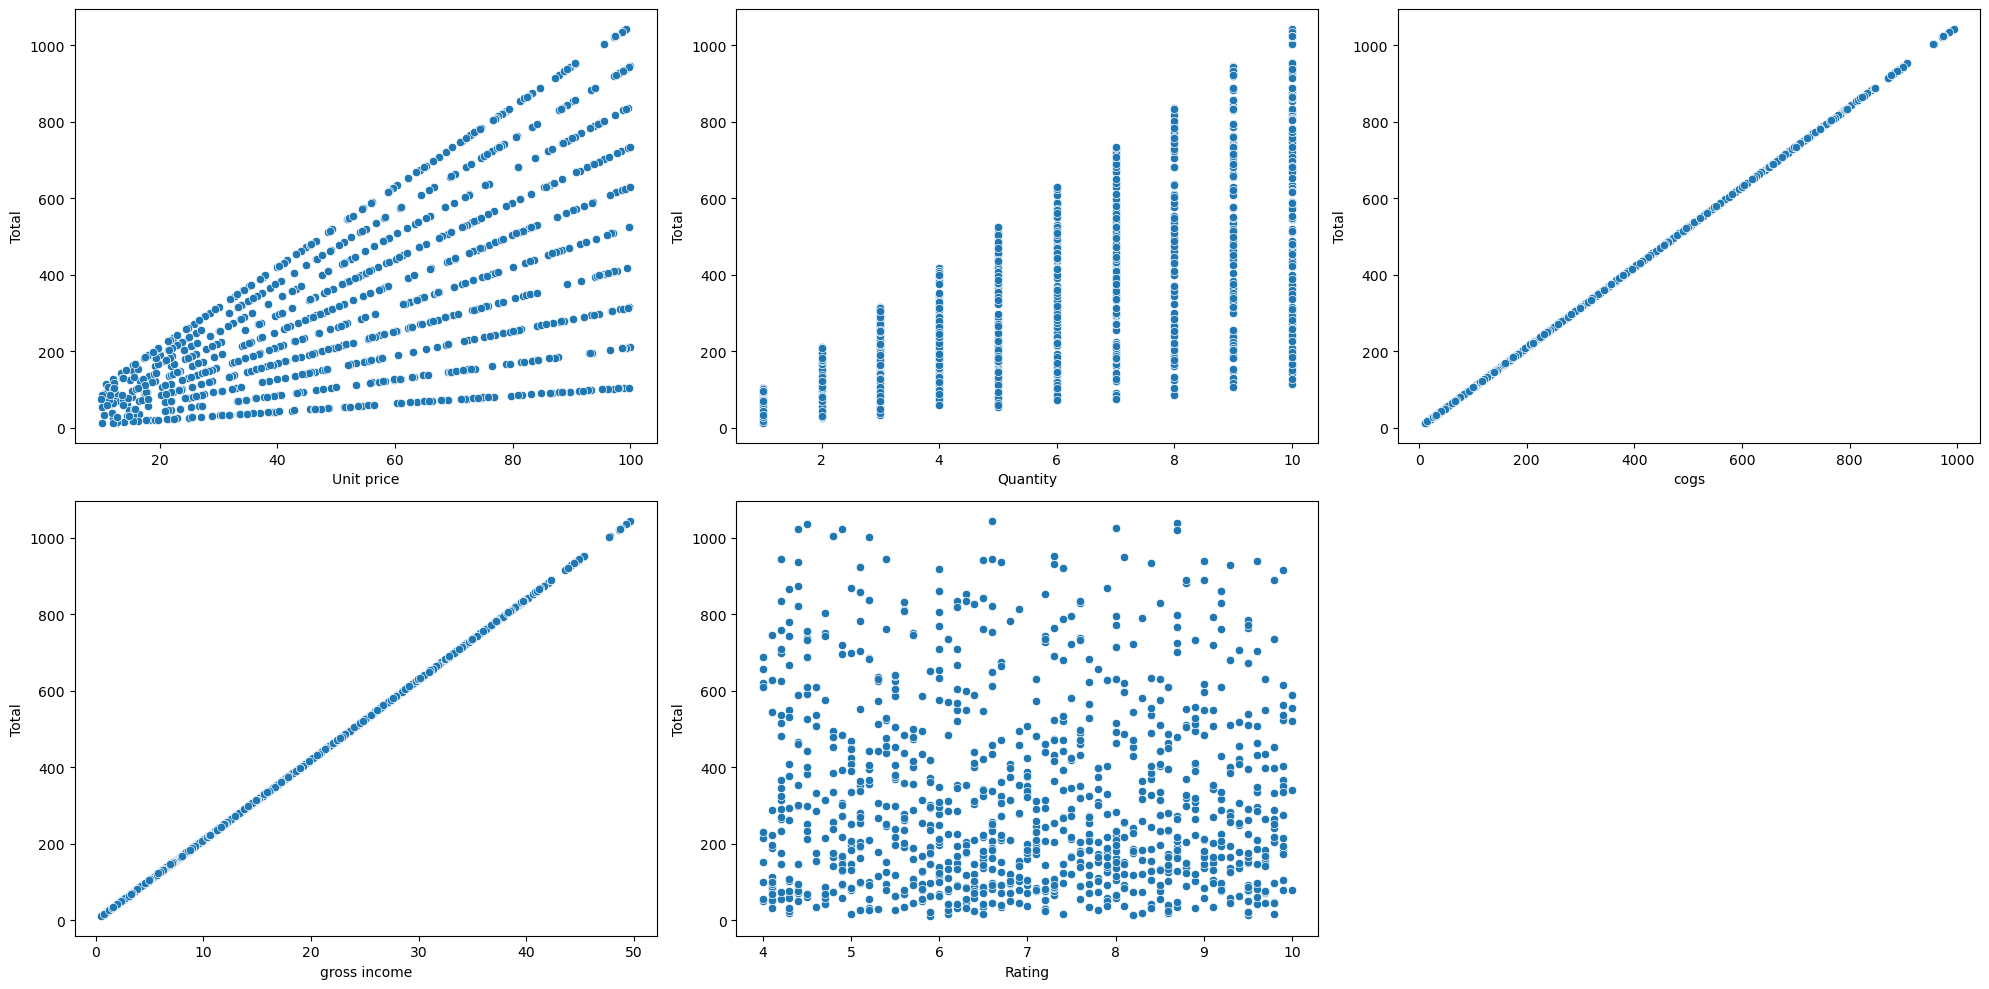

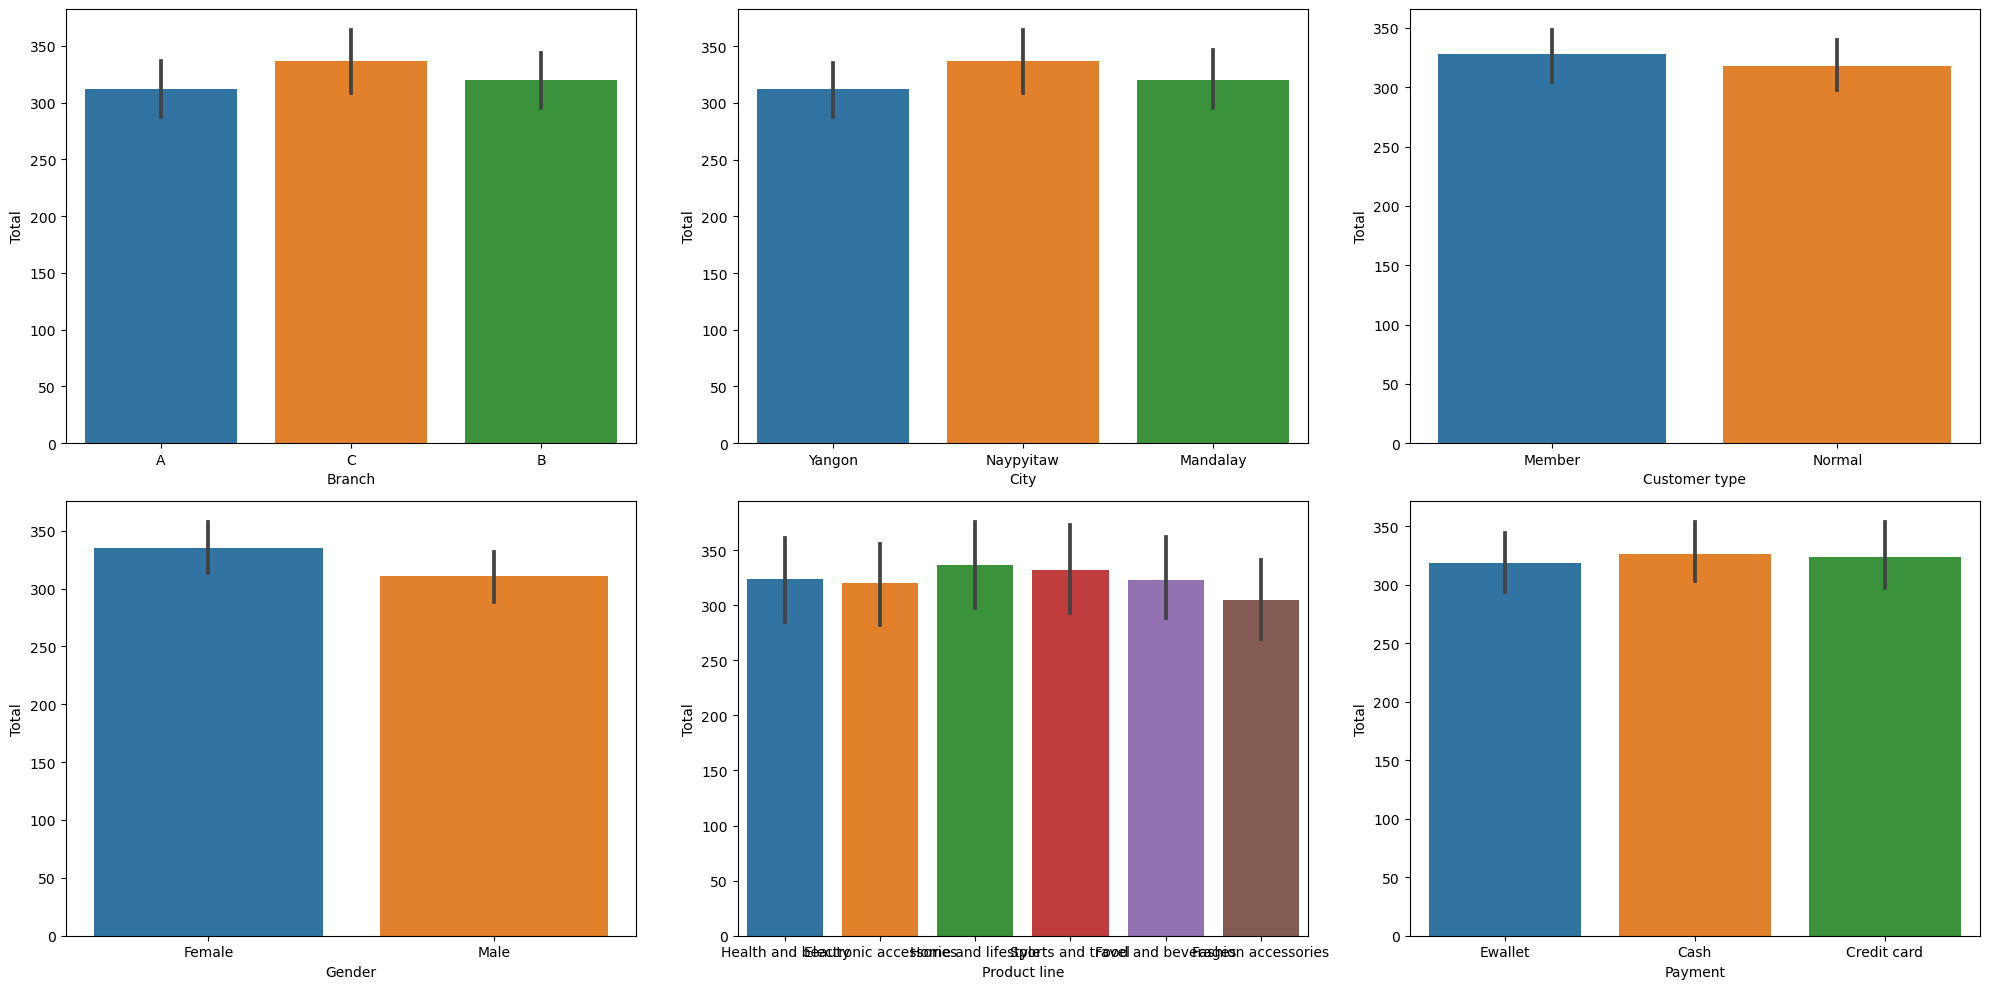

In [42]:
# Bivariate Analysis

# Scatter plots for numerical columns against 'Total'
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(['Unit price', 'Quantity', 'cogs', 'gross income', 'Rating']):
    row = i // 3
    pos = i % 3
    sns.scatterplot(x=data[col], y=data['Total'], ax=axs[row, pos])

fig.delaxes(axs[1,2]) # we remove the last sub-plot which is empty
plt.tight_layout()
plt.show()

# Bar plots for categorical columns against 'Total'
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']):
    row = i // 3
    pos = i % 3
    sns.barplot(x=data[col], y=data['Total'], ax=axs[row, pos])

plt.tight_layout()
plt.show()


### Numerical Variables vs Total:
## 🔢 Unit price vs Total: As expected, there is a positive relationship between the unit price and the total cost of a transaction. As the unit price increases, the total cost also increases. 💲💰

## 🔢 Quantity vs Total: There is also a positive relationship between the quantity of items purchased and the total cost. As customers buy more items, the total cost increases. 🛍️💰

## 🔢 cogs vs Total: There is a perfect positive relationship between the cost of goods sold (COGS) and the total cost. This is expected as the total cost is derived from the COGS. 📦💰

## 🔢 Gross income vs Total: There is a positive relationship between gross income and the total cost, which is expected as the gross income is derived from the tax that is included in the total cost. 💵💰

### 🔢 Rating vs Total: There doesn't seem to be a clear relationship between the customer rating and the total cost. ⭐️💰
## Categorical Variables vs Total:
### 🏬 Branch vs Total: The average total transaction cost is roughly the same across all branches. 🌳💰

### 🌆 City vs Total: The average total transaction cost is roughly the same across all cities. 🏙️💰

### 👥 Customer type vs Total: There is no significant difference in the total transaction cost between members and normal customers. 🤝💰

### 🧑‍🤝‍🧑 Gender vs Total: There is no significant difference in the total transaction cost between male and female customers. ♀️♂️💰

### 🛍️ Product line vs Total: There is some variation in the total transaction cost across different product lines. Home and lifestyle, and Sports and travel seem to have slightly higher transaction costs on average. 👗👠💰

#### 💳 Payment vs Total: The average total transaction cost is roughly the same across all payment methods. 💻💰

##### Next, we'll move on to the multivariate analysis. This will involve examining the interactions among multiple variables at once. For example, we might look at how the total cost and quantity of items purchased vary with the product line, or how the total cost varies with the unit price and quantity for different branches. 📊🔍

## 3| Multivariate Analysis


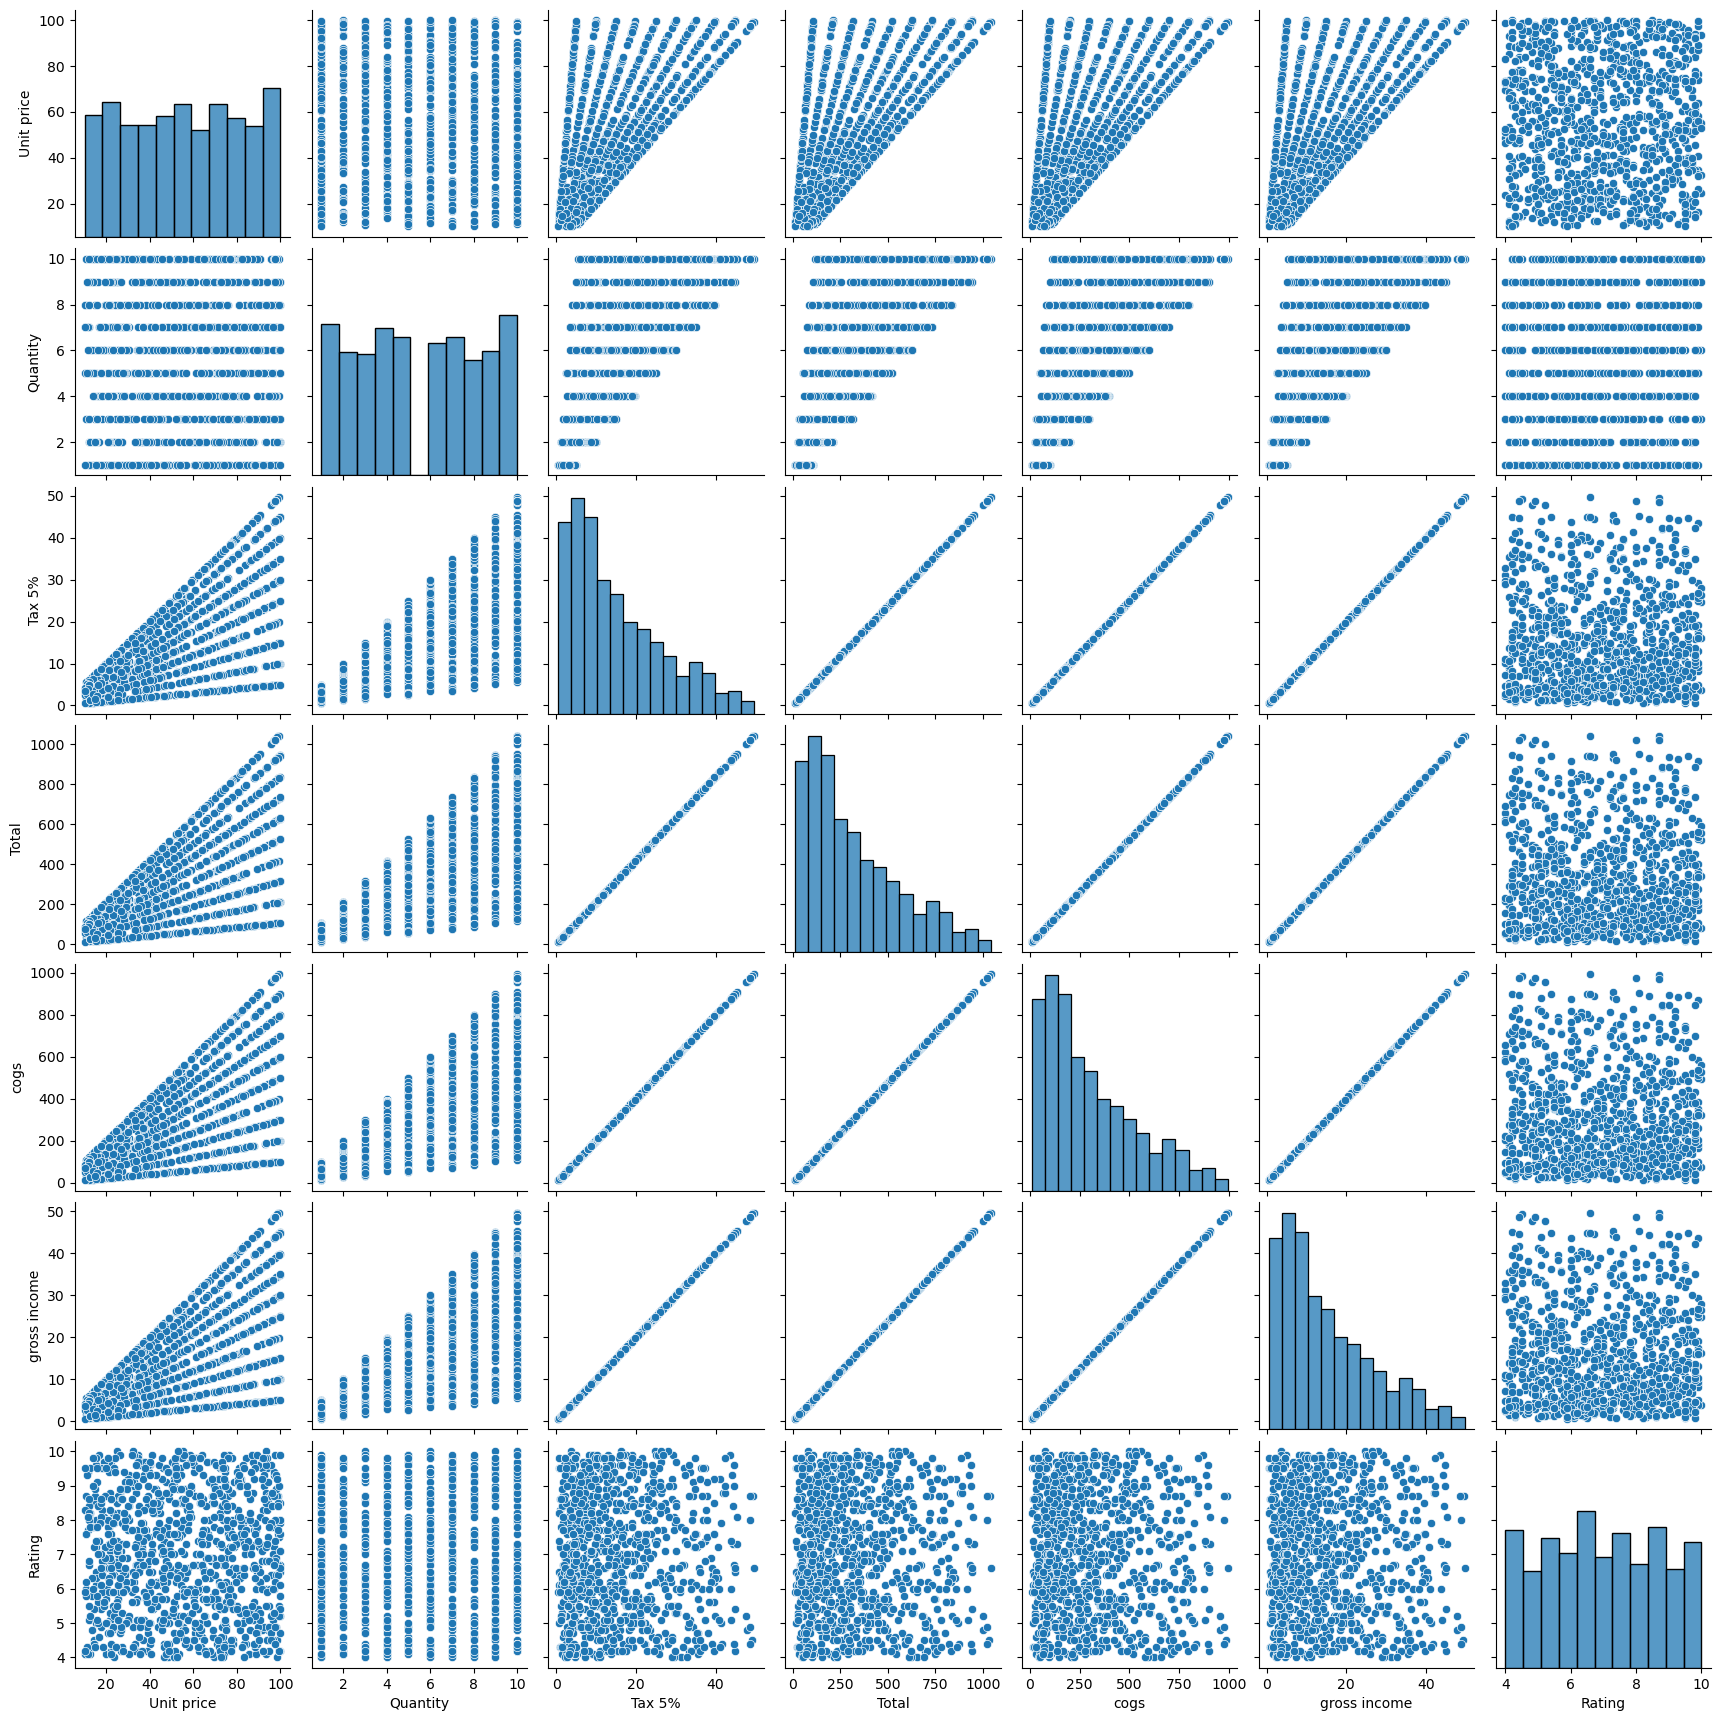

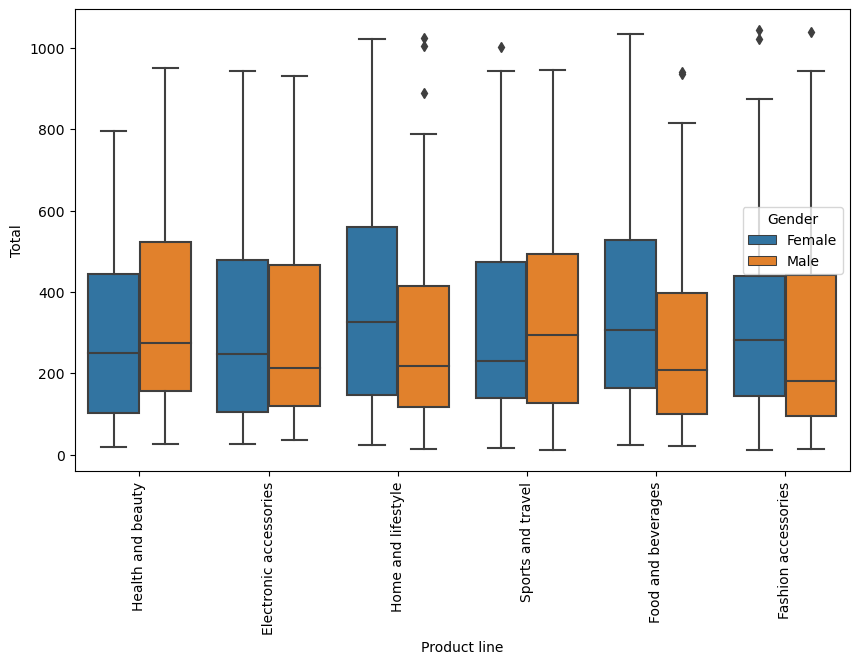

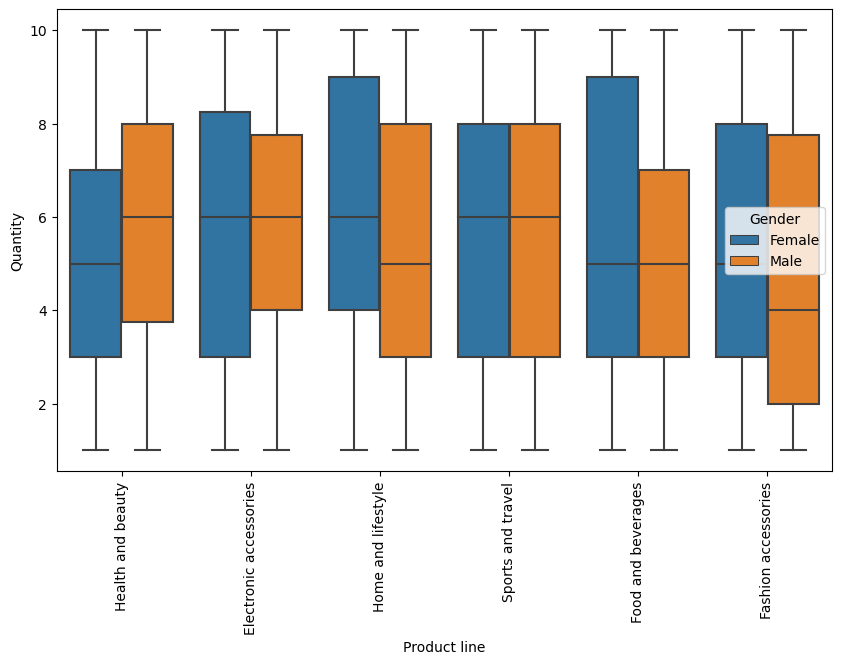

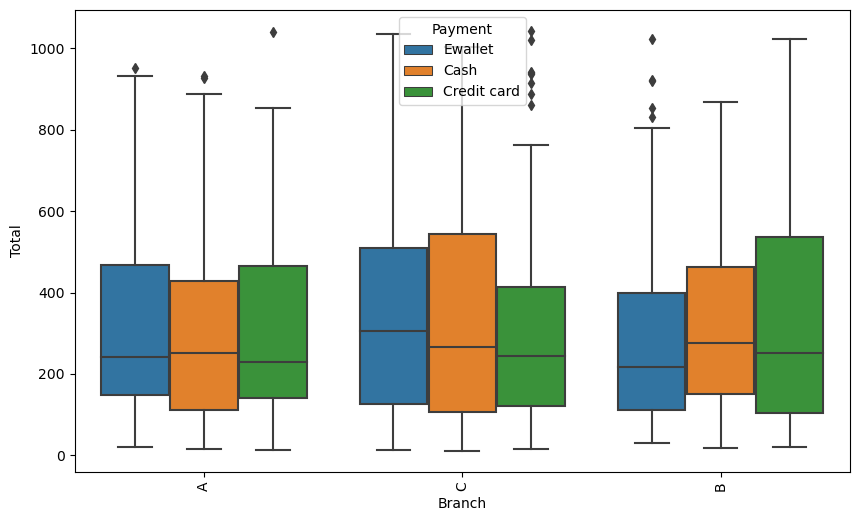

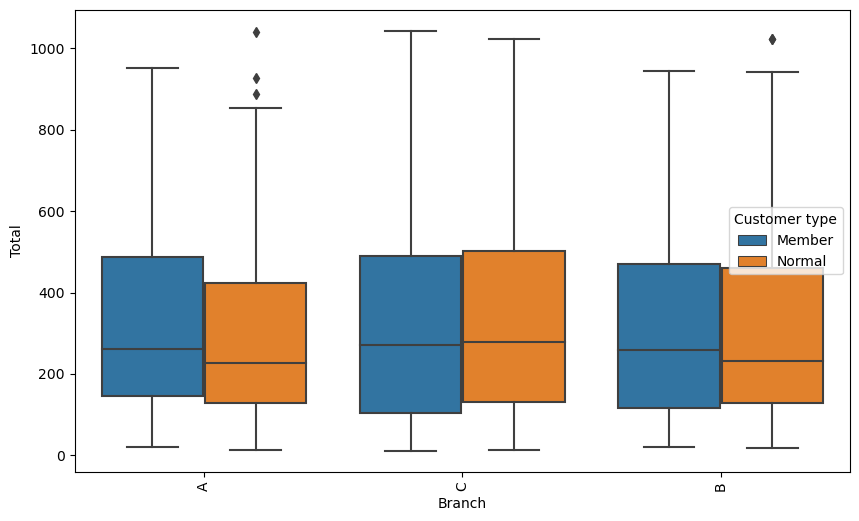

In [44]:
# Multivariate Analysis

# Pairplot for numerical columns
sns.pairplot(data[numerical_columns])
plt.show()

# Box plot for 'Product line', 'Total' and 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Total', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.show()

# Box plot for 'Product line', 'Quantity' and 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Quantity', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.show()

# Box plot for 'Branch', 'Total' and 'Payment'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='Total', hue='Payment', data=data)
plt.xticks(rotation=90)
plt.show()

# Box plot for 'Branch', 'Total' and 'Customer type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='Total', hue='Customer type', data=data)
plt.xticks(rotation=90)
plt.show()


## INTEPRET THE RESULTS
### 📊 Pairplot for Numerical Variables: The pairplot provides a comprehensive view of relationships and distributions across multiple numerical variables. Most relationships and distributions have already been covered in the univariate and bivariate analyses. 📈🔍

### 📊 Box plot for 'Product line', 'Total' and 'Gender': The distribution of total transaction costs across different product lines is similar for both genders. However, there are some differences in the spread and median transaction cost among different product lines. 👗👠💰♀️♂️

### 📊 Box plot for 'Product line', 'Quantity' and 'Gender': The quantity of items purchased in a single transaction across different product lines is similar for both genders. The distribution of quantities also seems to be fairly consistent across different product lines. 👗👠🛍️♀️♂️

### 📊 Box plot for 'Branch', 'Total' and 'Payment': The distribution of total transaction costs across different branches seems to be similar for all payment methods. However, there are some differences in the spread and median transaction cost among different branches. 🌳💰💳

### 📊 Box plot for 'Branch', 'Total' and 'Customer type': The distribution of total transaction costs across different branches is similar for both member and normal customers. However, there are some differences in the spread and median transaction cost among different branches. 🌳💰🤝

##### This concludes the exploratory data analysis. It's important to note that these visualizations provide a high-level overview of the data, and more detailed statistical analyses may be needed to uncover more complex relationships and trends. 🧐📊

# FURTHER ANALYSIS

  ## 1. Check Distribution
  ## 2. Unit Price Distribution Plot
  ## 3. Transaction Density during the open hours Plotn
  ## 4. Check Distribution
  ## 5. Weekly Sales by City Plot
  ## 6. Comparision of Sales between branch Plot







  ## 1. Check Distribution


Unit price: mu = 55.67, sigma = 26.48
Unit price: Skewness: 0.01
Unit price: Kurtosis: -1.22


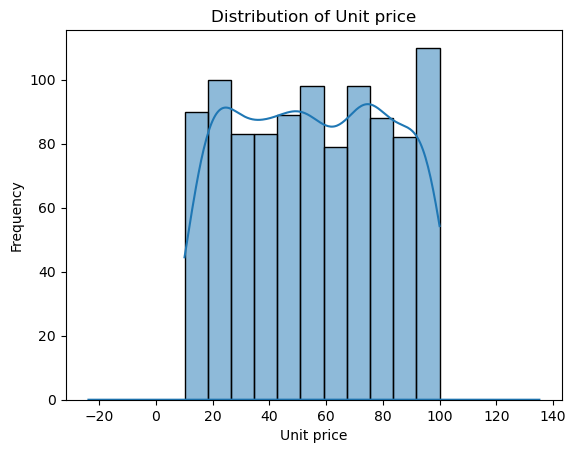

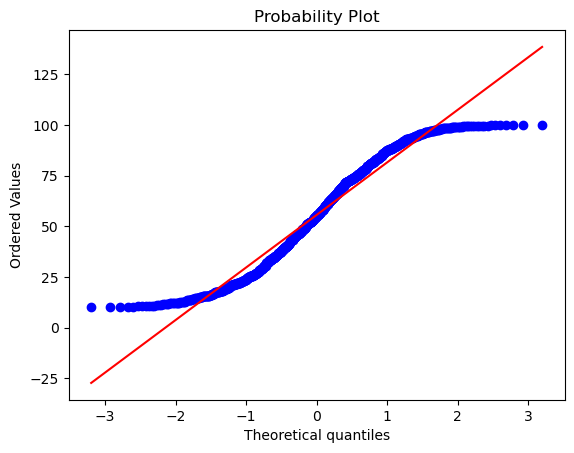

Total: mu = 322.97, sigma = 245.76
Total: Skewness: 0.89
Total: Kurtosis: -0.08


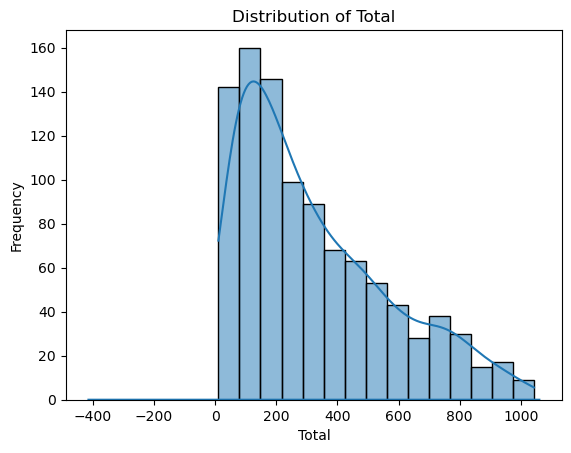

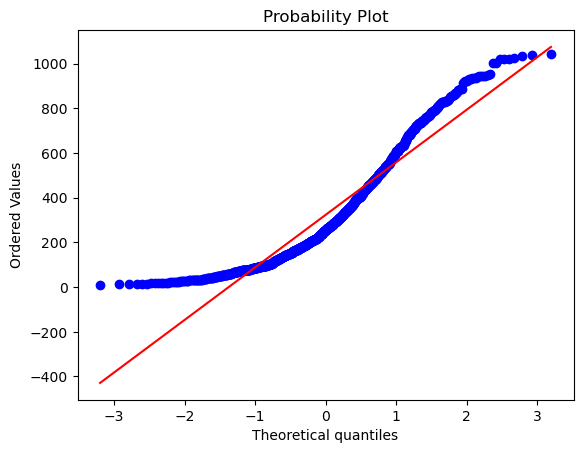

Rating: mu = 6.97, sigma = 1.72
Rating: Skewness: 0.01
Rating: Kurtosis: -1.15


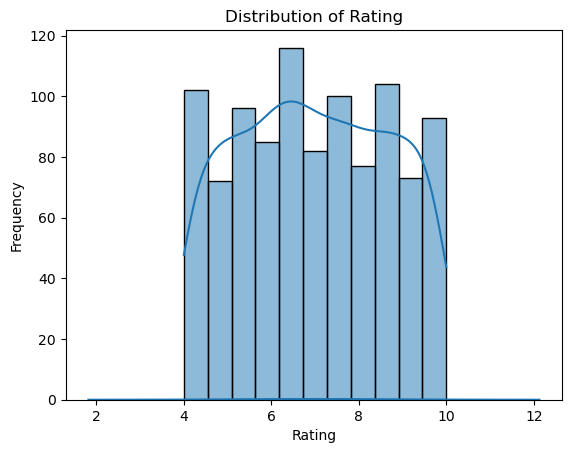

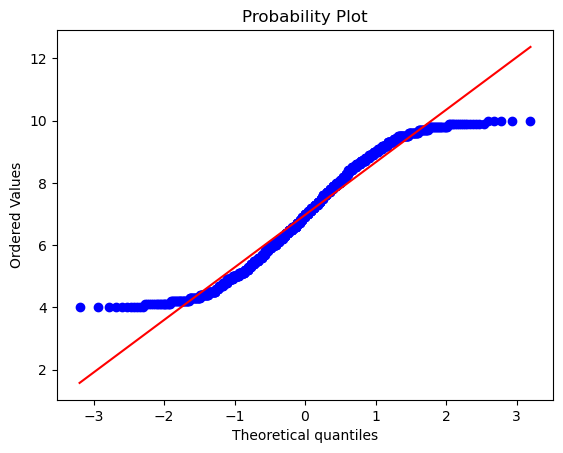

gross income: mu = 15.38, sigma = 11.70
gross income: Skewness: 0.89
gross income: Kurtosis: -0.08


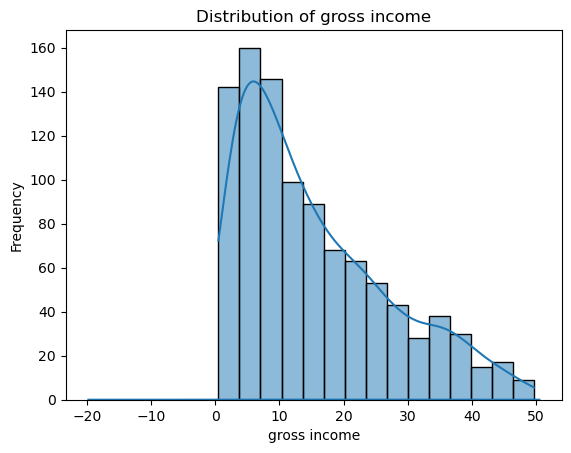

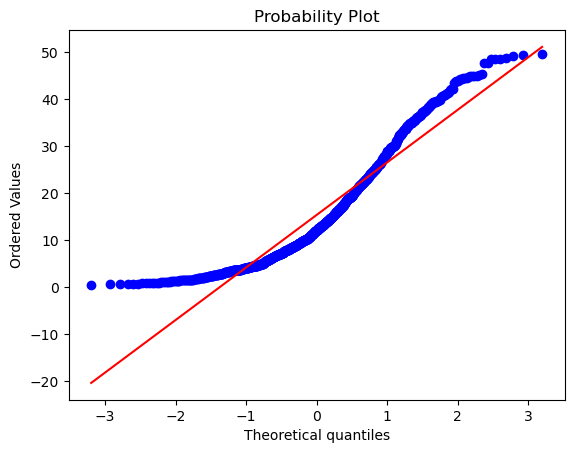

In [46]:
# Create a list of the columns to analyze
columns = ['Unit price', 'Total', 'Rating', 'gross income']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

    plt.show()

# 2. Unit Price Distribution Plot 

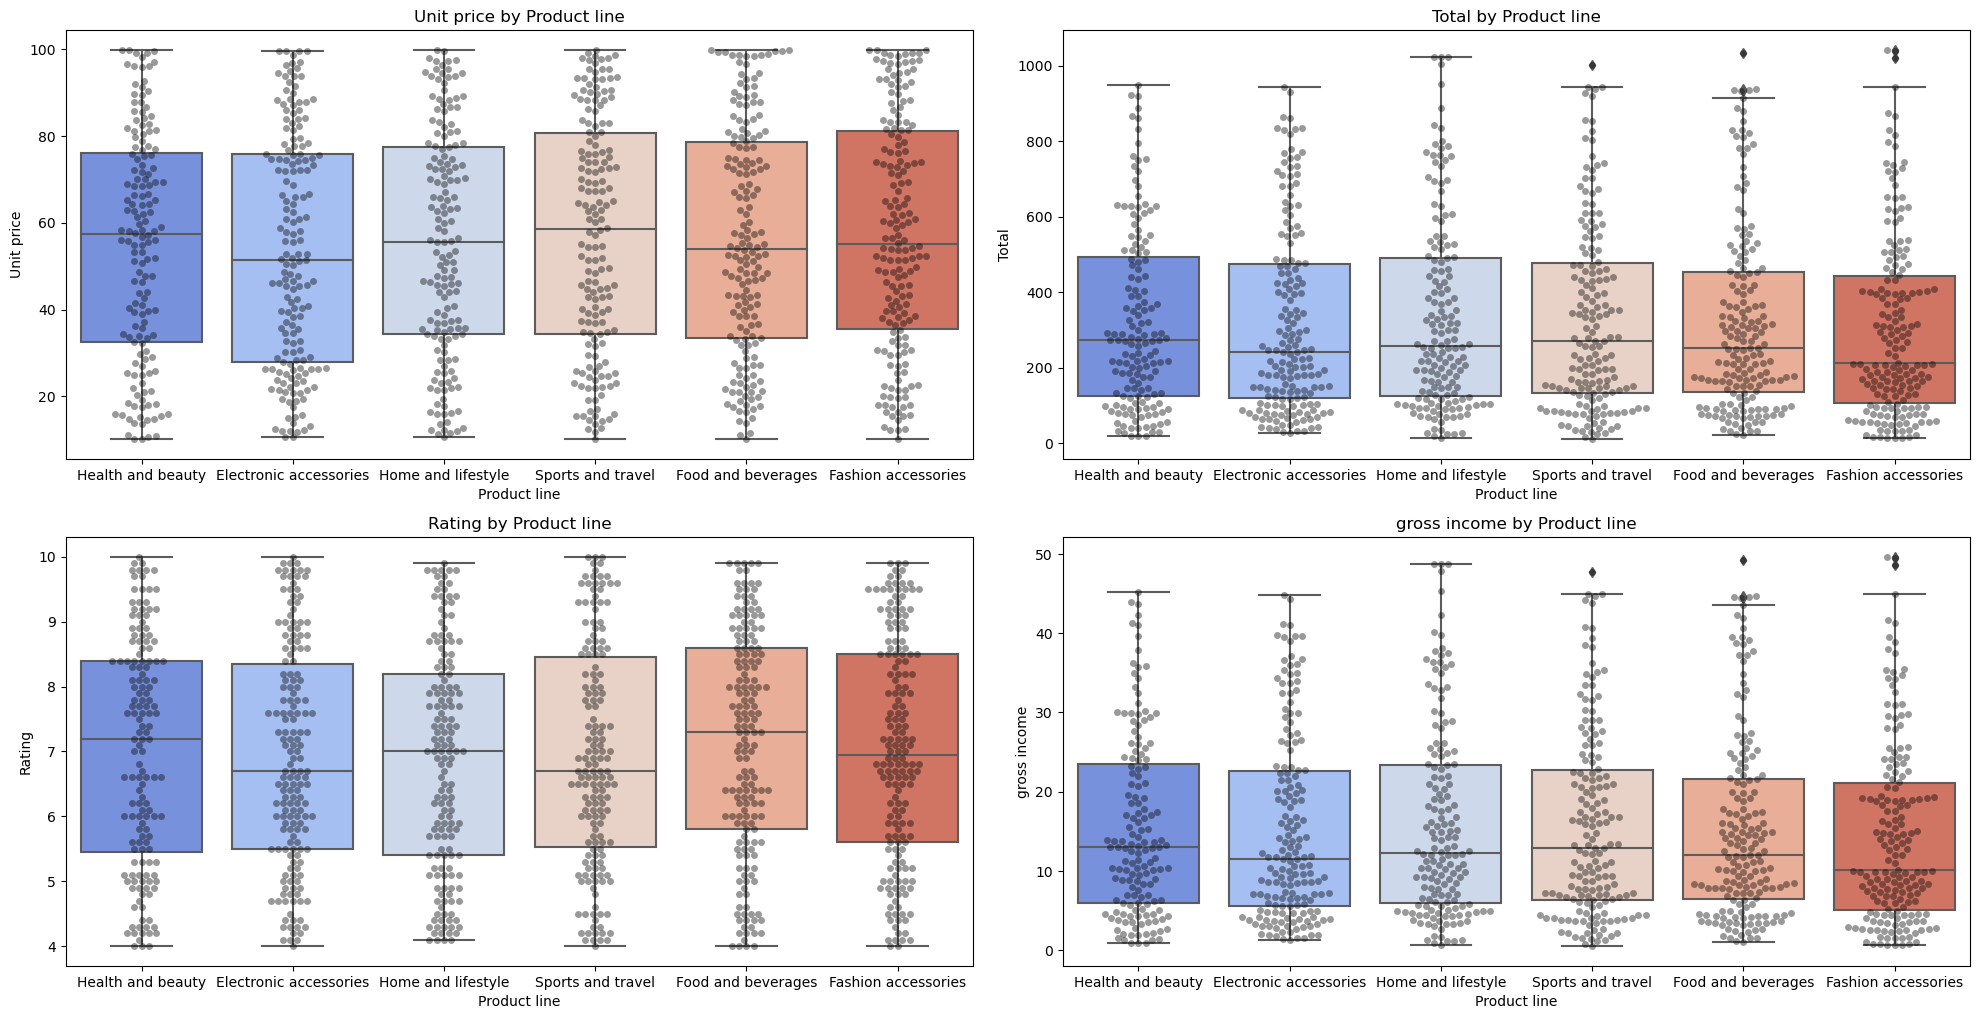

In [47]:
# Box plots and swarm plots
columns = ['Unit price', 'Total', 'Rating', 'gross income']

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns):
    plt.subplot(len(columns), 2, i + 1)
    sns.boxplot(x='Product line', y=column, data=data, palette='coolwarm')
    sns.swarmplot(x='Product line', y=column, data=data, color='black', alpha=0.4)
    plt.title(f'{column} by Product line')
plt.tight_layout()
plt.show()

# 3. Transaction Density during the open hours Plotn


In [48]:
#Convert the 'Time' column to a datetime object and filter the data to only include store open hours:
data['Time'] = pd.to_datetime(data['Time'])
data = data[(data['Time'].dt.hour >= 10) & (data['Time'].dt.hour < 21)]

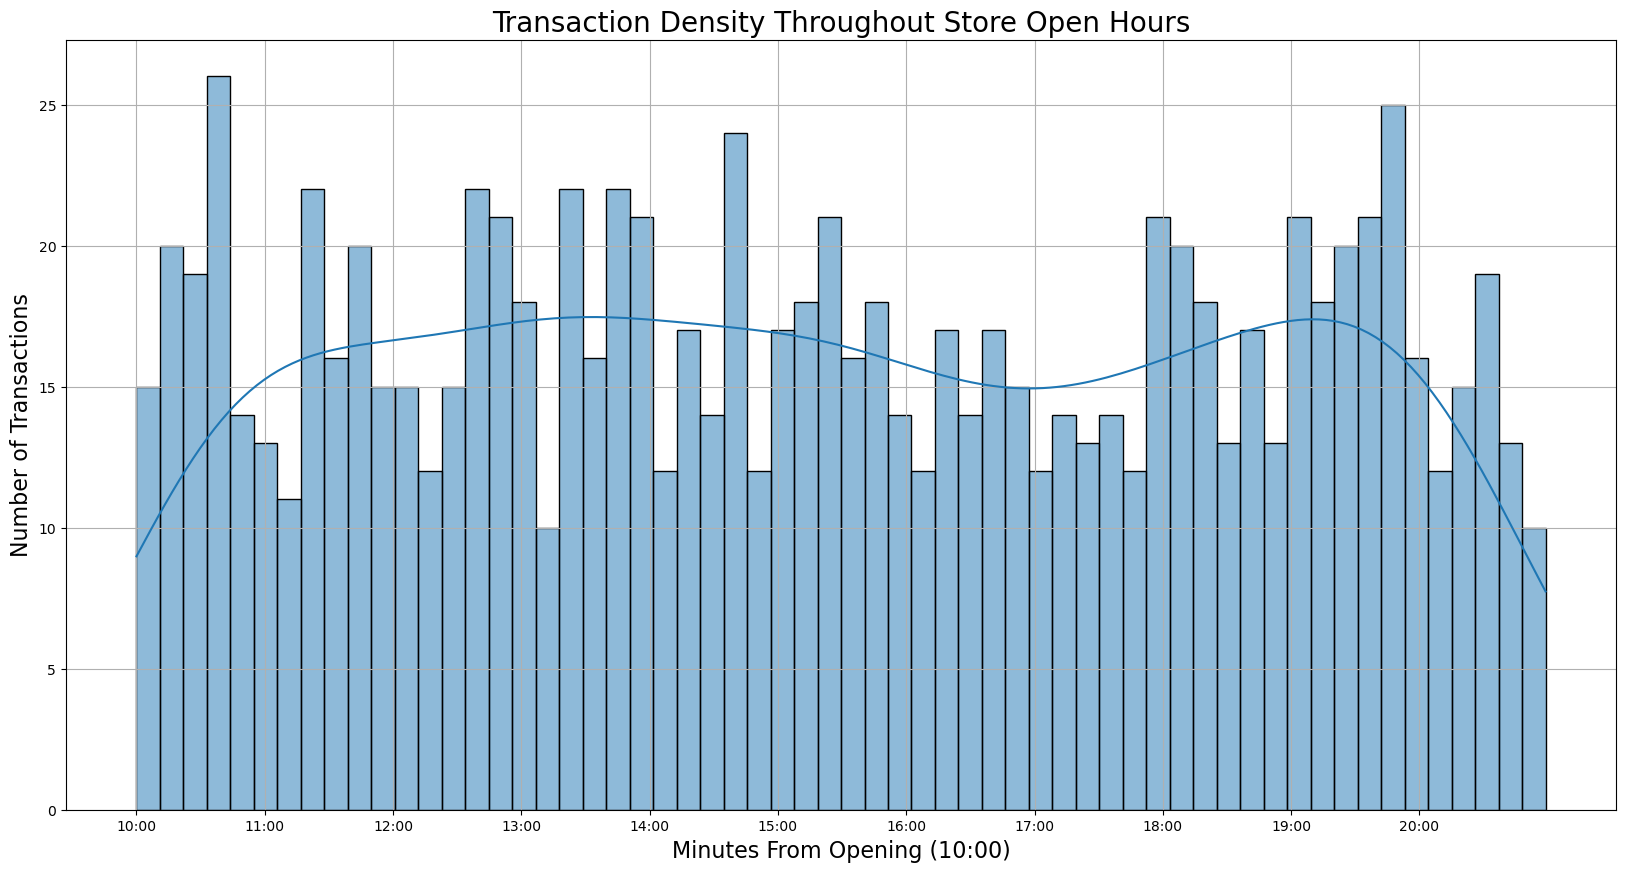

In [49]:
#Convert 'Time' to minutes from store opening:
data['MinutesFromOpening'] = (data['Time'].dt.hour - 10) * 60 + data['Time'].dt.minute
#Create a distribution plot to visualize the transaction density:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x='MinutesFromOpening', bins=60, kde=True)
plt.title('Transaction Density Throughout Store Open Hours', fontsize=20)
plt.xlabel('Minutes From Opening (10:00)', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=16)
plt.xticks(np.arange(0, 660, 60), [f"{10 + t // 60:02d}:{t % 60:02d}" for t in np.arange(0, 660, 60)])
plt.grid(True)
plt.show()

##### The transaction density plot shows the distribution of transaction density over the course of the day (from 10.00-21.00), with a peak in transaction density occurring shortly after the store opening and a decrease in density as the day progresses. This information can be useful for understanding the store's traffic patterns and making decisions about staffing and inventory management.

# 4. Check Distribution


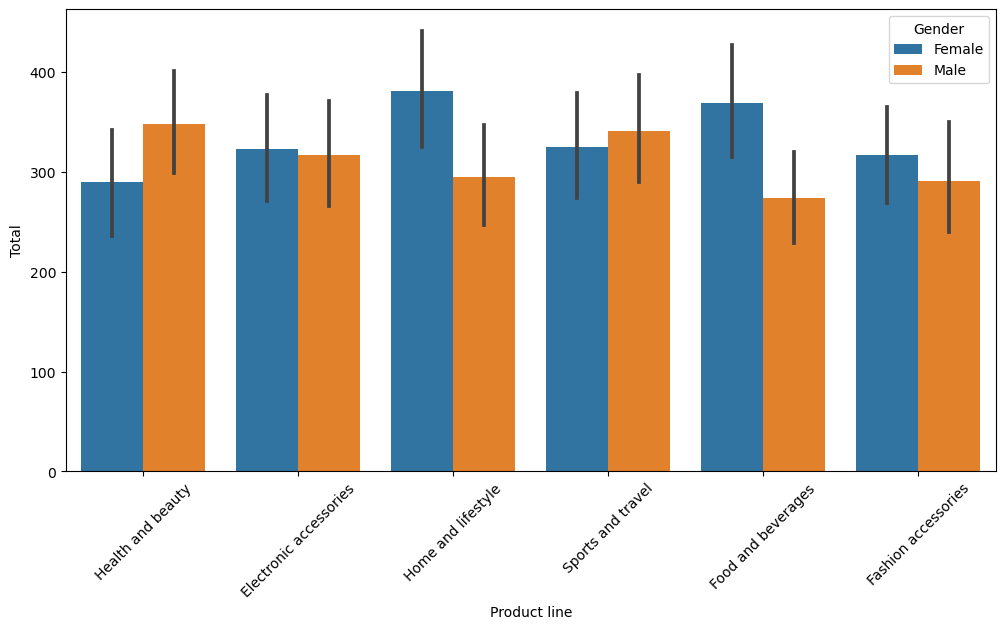

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', hue='Gender', data=data)
plt.xticks(rotation=45)
plt.show()

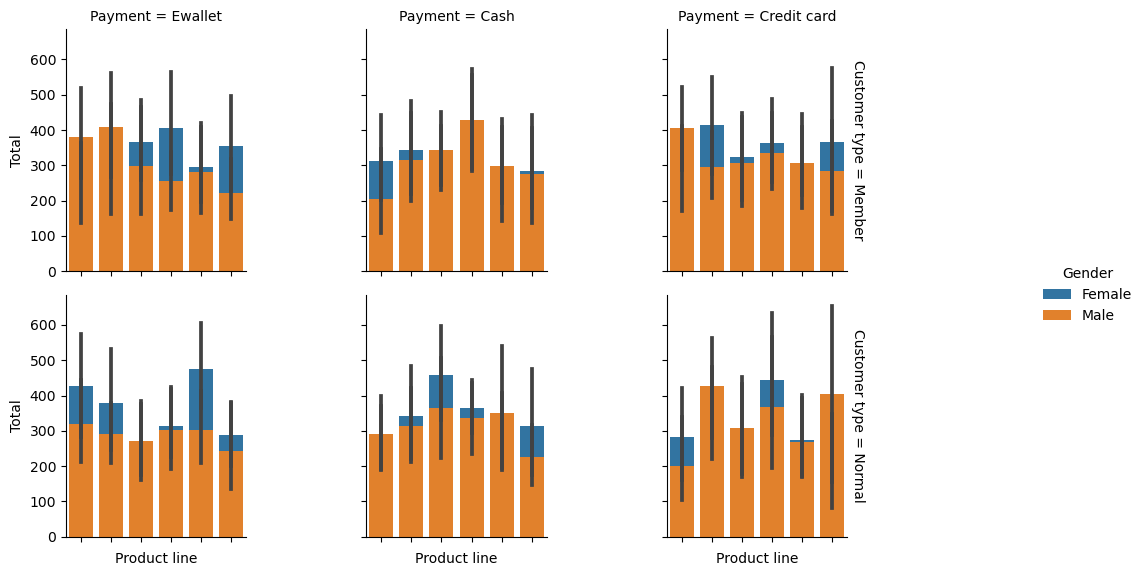

In [52]:
g = sns.FacetGrid(data, col='Payment', row='Customer type', hue='Gender', margin_titles=True)
g.map(sns.barplot, 'Product line', 'Total')

# Set custom legend properties
g.add_legend(title='Gender', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

# Improve the readability of the 'Product line' labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.show()

#### The resulting plot shows a series of bar charts, each one corresponding to a combination of 'Payment', 'Customer type', and 'Gender'. The bar charts show the total sales for each product line, and the colors of the bars indicate the gender of the customers. This plot allows us to quickly identify any patterns or trends in sales based on the different categories, and can be useful for making informed decisions about marketing, inventory management, and staffing.

# 5. Weekly Sales by City Plot


In [53]:
# Resample the data to show weekly total sales
data['Date'] = pd.to_datetime(data['Date'])
weekly_data = data.groupby(['City', pd.Grouper(key='Date', freq='W')])['Total'].sum().reset_index()

In [ ]:
mean_total_sales = weekly_data.groupby('Date')['Total'].mean().reset_index()
mean_total_sales.rename(columns={'Total': 'Mean Total Sales'}, inplace=True)

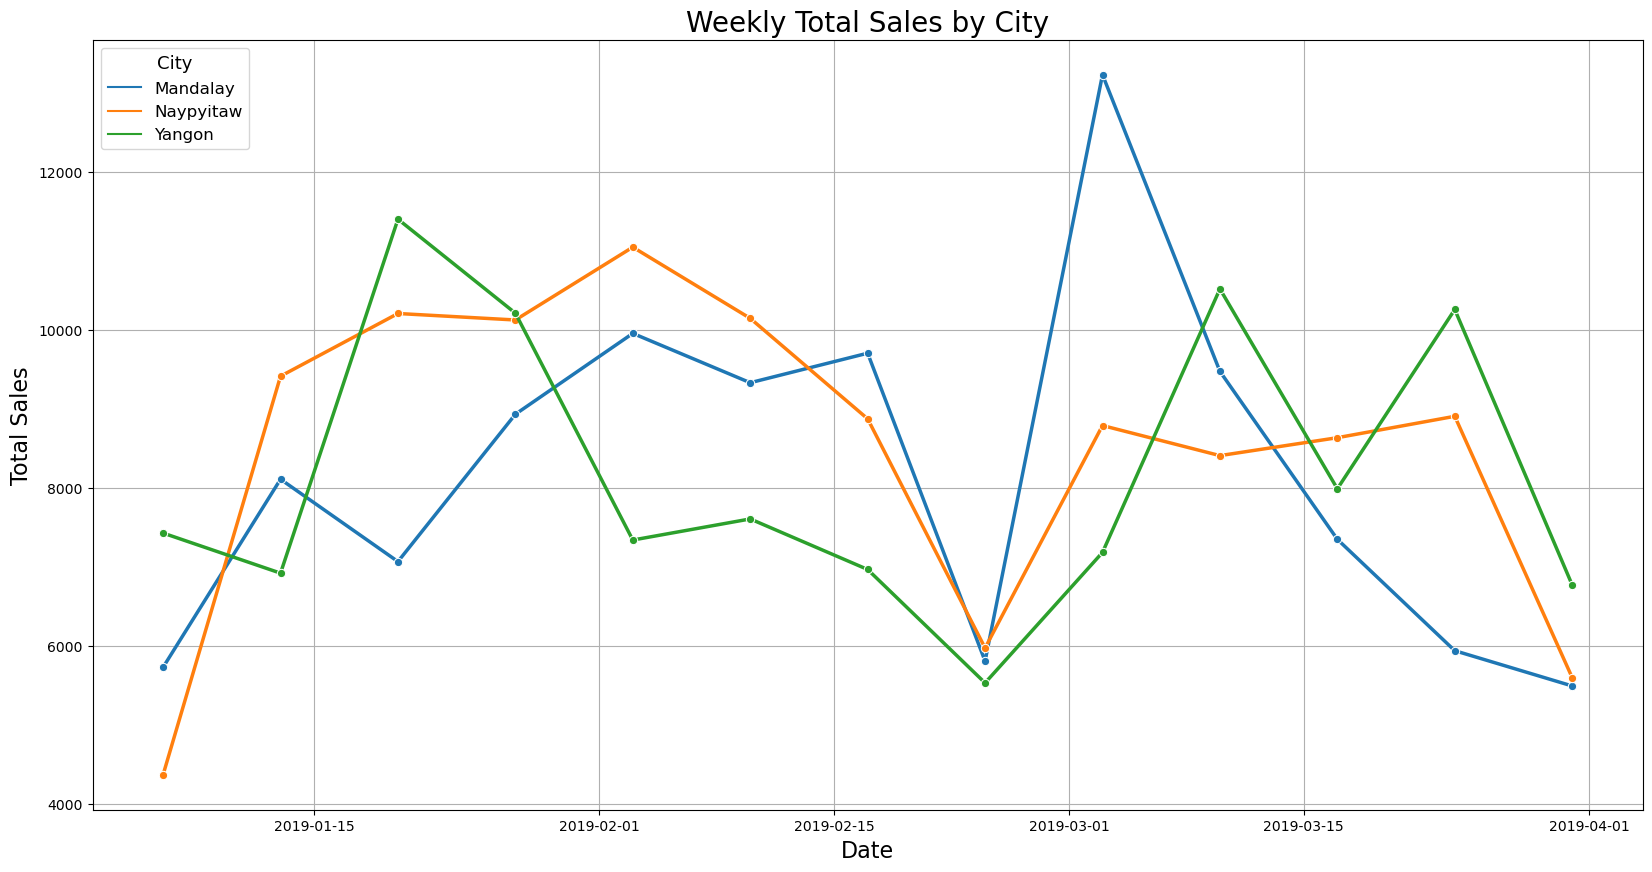

In [54]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Total', hue='City', data=weekly_data, marker='o', linewidth=2.5)
plt.title('Weekly Total Sales by City', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.legend(title='City', title_fontsize='13', loc='upper left', fontsize='12')
plt.show()

#### Weekly Total Sales plot help us identify any trends or patterns in the sales data. For example, if we see an increasing trend in sales over time for a particular city, we may want to investigate why this is happening and try to capitalize on it. Conversely, if we see a decreasing trend in sales over time, we may want to investigate what is causing this and try to make changes to improve sale

# 6. Comparision of Sales between branch Plot


In [55]:
data['Month'] = data['Date'].dt.month


In [57]:
grouped_data = data.groupby(['City', 'Month'])['Total'].sum().reset_index()


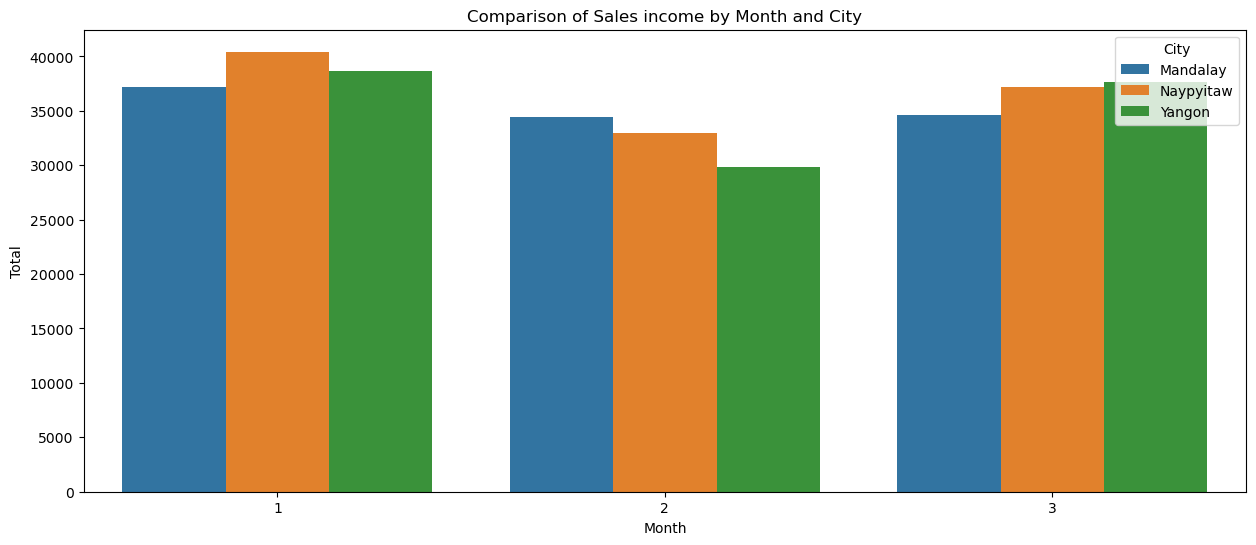

In [58]:
# Visualize the comparison using a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='Total', hue='City', data=grouped_data)
plt.title('Comparison of Sales income by Month and City')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='City', loc='upper right')
plt.show()

In [60]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Check the date range in the dataset
date_range = data['Date'].min(), data['Date'].max()
date_range

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-03-30 00:00:00'))

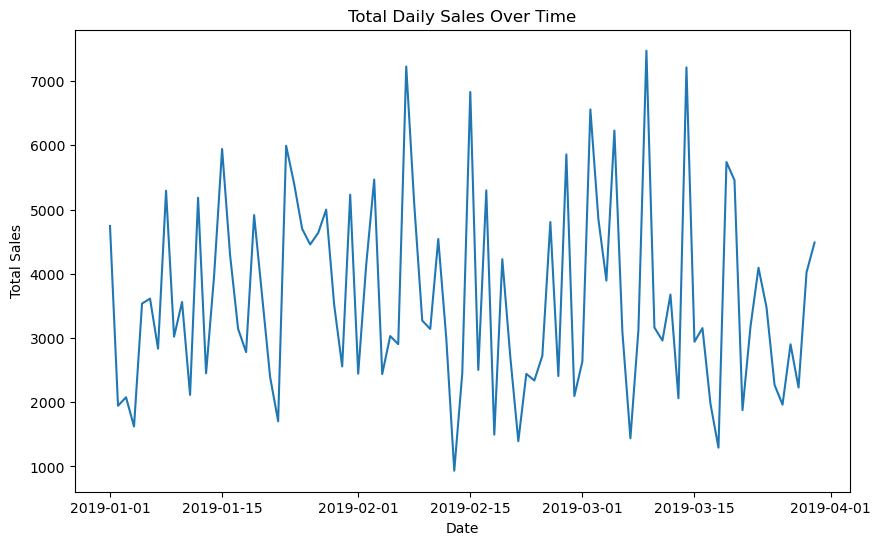

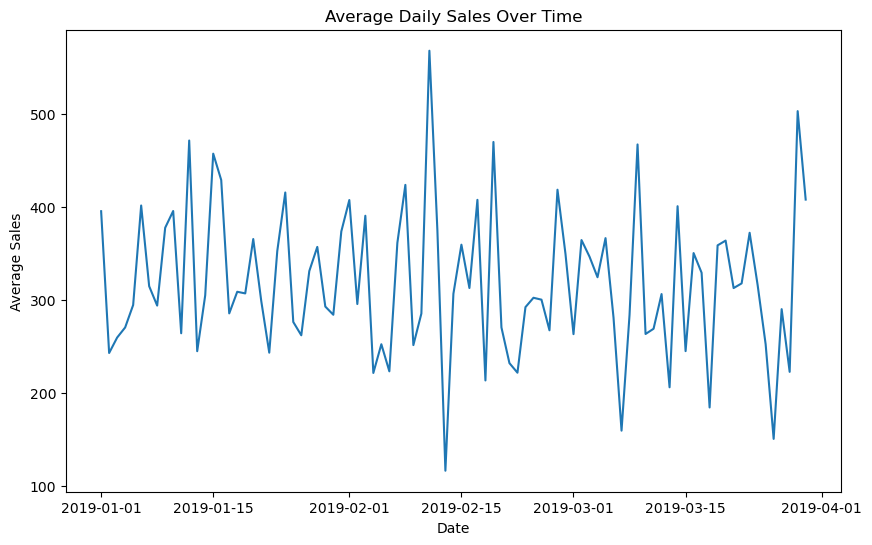

In [62]:
 
# Aggregate the total sales by date
sales_by_date = data.groupby('Date')['Total'].sum()

# Plot the total sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values)
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Aggregate the average sales by date
average_sales_by_date = data.groupby('Date')['Total'].mean()

# Plot the average sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_sales_by_date.index, y=average_sales_by_date.values)
plt.title('Average Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.show()


### 📈 Total Daily Sales Over Time: The total sales vary quite a bit from day to day. There are several peaks and troughs, suggesting that the sales volume may be influenced by factors such as day of the week or promotional events. There doesn't appear to be a clear increasing or decreasing trend over this three-month period. 📊💰

### 📈 Average Daily Sales Over Time: Similar to total sales, the average sales per day also fluctuate quite a bit. There are several peaks and troughs, indicating variability in the sales process. Again, there doesn't appear to be a clear increasing or decreasing trend over this three-month period. 📊💰

### Next, let's examine the variation in sales over different days of the week. To do this, we'll need to create a new column for the day of the week. 📆

#### Please note that these observations are based on the given dataset and timeframe. It's important to consider additional factors and conduct further analysis to fully understand the patterns and trends in sales data. 🧐📊

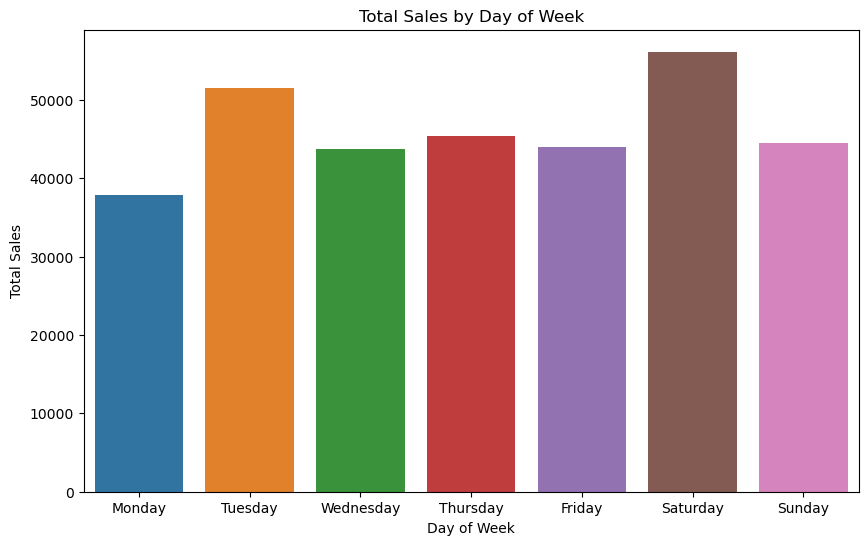

In [63]:
# Add a new column for the day of the week
data['Day of Week'] = data['Date'].dt.day_name()

# Aggregate the total sales by day of the week
sales_by_day_of_week = data.groupby('Day of Week')['Total'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the total sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()


##### The bar plot illustrates the total sales by day of the week. It seems that the sales are relatively consistent across all days of the week, with a slight peak on Saturday. 📊💰

#### This kind of analysis can be very useful for planning and operations. For example, if certain days of the week consistently have higher sales, the supermarket might consider scheduling more staff or running promotions on those days. 🗓️✨

##### Finally, let's examine how the sales vary across different product lines over time. To do this, we'll plot a line graph of total daily sales for each product line. 📈

#### Please note that the observations and implications mentioned above are based on the given dataset and analysis. Further investigation and consideration of other factors may be necessary for more accurate and actionable insights. 🧐📊

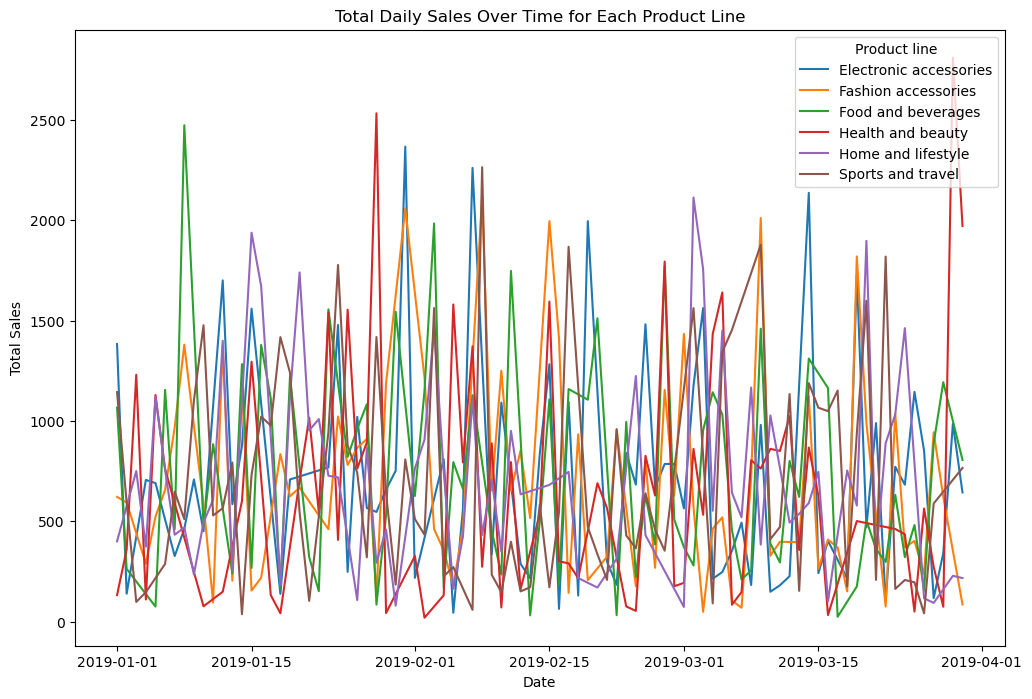

In [64]:
# Aggregate the total sales by date and product line
sales_by_date_product = data.groupby(['Date', 'Product line'])['Total'].sum().reset_index()

# Plot the total sales over time for each product line
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Total', hue='Product line', data=sales_by_date_product)
plt.title('Total Daily Sales Over Time for Each Product Line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#### The line plot shows the total daily sales over time for each product line. This visualization provides insights into how sales for different product lines fluctuate over time. 📈

#### From the graph, we can see that sales for all product lines have peaks and troughs, indicating variability in daily sales. However, there doesn't appear to be a clear increasing or decreasing trend for any specific product line over the three-month period. 🔄

#### There is also no clear pattern that suggests a certain product line consistently outperforms or underperforms others on any specific days. Sales appear to be quite balanced among different product lines. ⚖️

#### This information can help the supermarket understand the overall sales patterns and identify any potential areas for improvement or opportunities for targeted marketing and promotions. Further analysis or deeper investigation may be required to uncover more insights or specific trends related to each product line. 🛒🔍

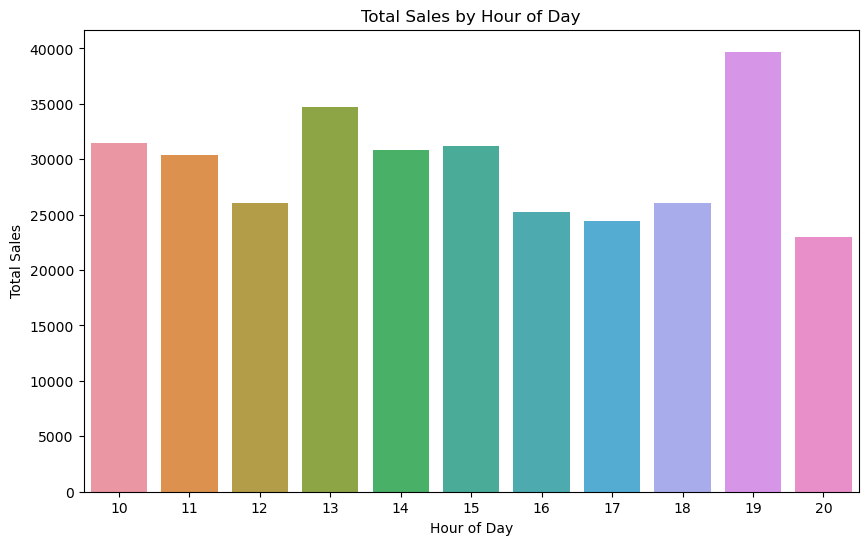

In [65]:
# Convert 'Time' column to datetime type and extract the hour
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour

# Aggregate the total sales by hour
sales_by_hour = data.groupby('Hour')['Total'].sum()

# Plot the total sales by hour
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

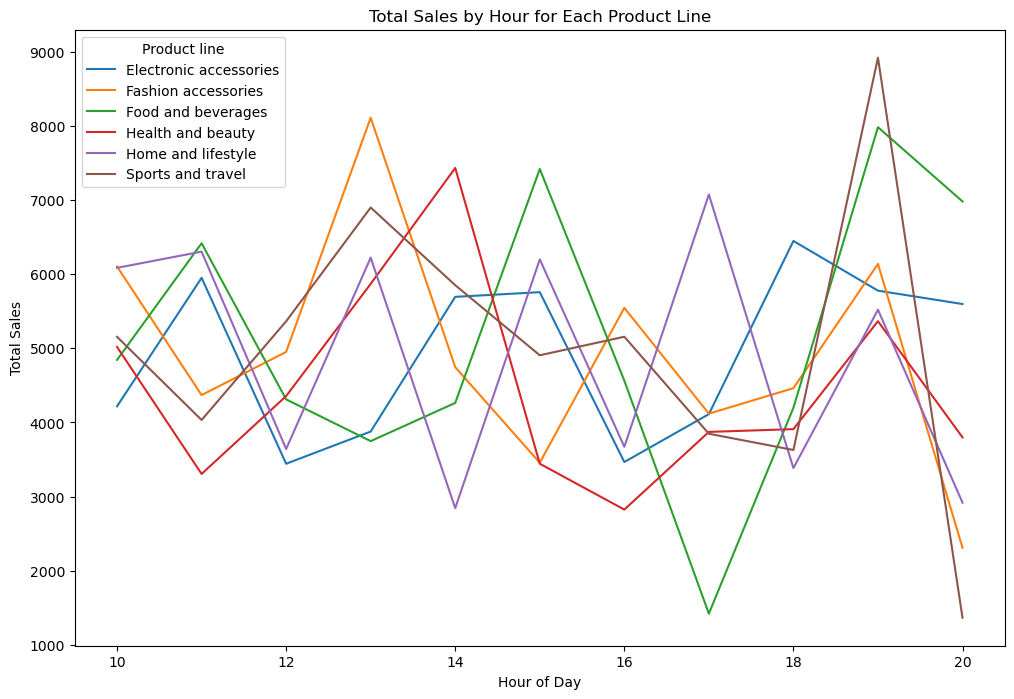

In [66]:
# Aggregate the total sales by hour and product line
sales_by_hour_product = data.groupby(['Hour', 'Product line'])['Total'].sum().reset_index()

# Plot the total sales by hour for each product line
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Total', hue='Product line', data=sales_by_hour_product)
plt.title('Total Sales by Hour for Each Product Line')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

### The line plot illustrates the total sales by hour of the day for each product line. This visualization provides insights into how sales for different product lines fluctuate at different times of the day. 📈⏰

### rom the graph, we can observe the following:
### Home and lifestyle: Sales for home and lifestyle products gradually increase from the morning hours, peak around 14:00 (2:00 PM), and then decline towards the evening. 🏠🌇

### Health and beauty: Sales for health and beauty products also follow a similar pattern, with a gradual increase throughout the morning and afternoon, peaking around 14:00 (2:00 PM), and declining towards the evening. 💆💄

### Electronic accessories: Sales for electronic accessories show a relatively steady pattern with a gradual increase in the morning, reaching a peak around 14:00 (2:00 PM), and then slowly declining. 📱💻

### Sports and travel: Sales for sports and travel products exhibit a similar trend, gradually increasing in the morning and early afternoon, peaking around 14:00 (2:00 PM), and declining thereafter. ⚽✈️

### Food and beverages: Sales for food and beverages show a slightly different pattern. There is a steady increase throughout the morning and early afternoon, with a peak around 13:00 (1:00 PM), followed by a gradual decline. 🍔🥤

### Fashion accessories: Sales for fashion accessories also follow a similar pattern, gradually increasing in the morning and early afternoon, peaking around 14:00 (2:00 PM), and then slowly declining. 👒👠

##### Overall, there is a consistent trend across different product lines, with sales peaking around 14:00 (2:00 PM) and gradually declining towards the evening. This information can be useful for inventory management, staffing decisions, and targeted promotions to maximize sales during peak hours. ⏰✨


# models

### in our analysis, we aimed to predict the 'Rating' variable using the provided dataset containing features such as 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment', and 'Gross income'. We extracted additional features from the 'Date' and 'Time' columns, performed one-hot encoding for categorical variables, and standardized the data before fitting various regression models.

In [71]:
# Convert 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Date features
data['day_of_week'] = data['Date'].dt.dayofweek
data['day_of_month'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

# Time features
data['Time'] = pd.to_datetime(data['Time'])
def map_time_interval(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

    # Apply the function to the 'Time' column
data['time_interval'] = data['Time'].apply(map_time_interval)

In [73]:
# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['City', 'Customer type', 'Gender', 'Product line', 'time_interval'], drop_first=True)

In [74]:
# Drop unnecessary columns
data_encoded.drop(['Invoice ID', 'Date', 'Time','Tax 5%','gross margin percentage','cogs','year'], axis=1, inplace=True)

In [75]:
# Identify non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(include=['object']).columns

In [76]:
# Perform One-Hot Encoding for the remaining non-numeric columns
data_encoded = pd.get_dummies(data_encoded, columns=non_numeric_columns, drop_first=True)

In [77]:
# Define target variable and features
X = data_encoded.drop('Rating', axis=1)
y = data_encoded['Rating']

In [78]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### The models used in our analysis include Linear Regression, Decision Tree, Random Forest, Support Vector Regression (SVR), K-Nearest Neighbors (KNN), and Neural Network (MLPRegressor). We evaluated the performance of these models using the R2 score.

In [81]:
 
# Model comparison

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name}: {r2}")

Linear Regression: -0.07647865366263651
Decision Tree: -0.6748965504191928
Random Forest: -0.11507303760846677
SVR: -0.16003096370536096
KNN: -0.21682352301947394
Neural Network: -0.6649557811753386


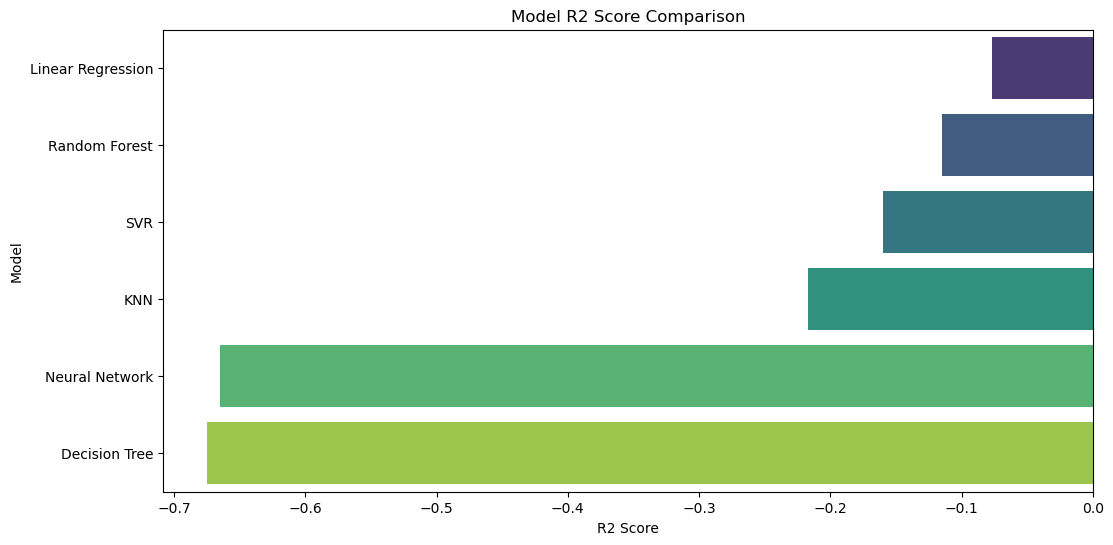

In [82]:
# Visualization
results_df = pd.DataFrame({"Model": list(results.keys()), "R2 Score": list(results.values())})
results_df = results_df.sort_values(by="R2 Score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="R2 Score", y="Model", palette="viridis")
plt.title("Model R2 Score Comparison")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()

### The results show that all the models have negative R2 scores, which indicates that they are worse than predicting the mean value of the target variable. This suggests that our current approach is not effective in predicting the 'Rating' variable.

 #                                              THANK YOU!
 #                                              ✔️